In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
# pd.DataFrame.hist(df, figsize = [15,15]);

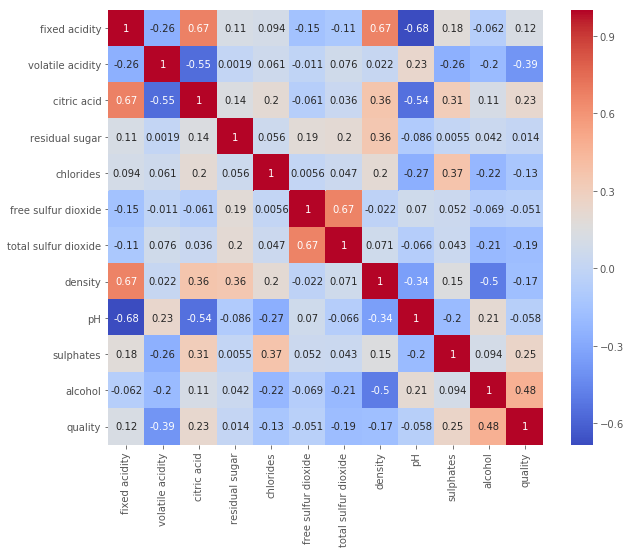

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='coolwarm')
plt.show()

In [2]:
features = df.drop('quality', 1).values
# df.describe()

In [3]:
def isGood(quality):
    if quality >= 6:
        return 1
    else:
        return 0
df['binary_quality'] = df['quality'].apply(isGood)
label = df['binary_quality'].values
# df['binary_quality'].value_counts()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42, stratify=label)

In [5]:
%%time
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test))

k-NN accuracy for test set: 0.634375
CPU times: user 37 ms, sys: 11.5 ms, total: 48.5 ms
Wall time: 47.6 ms


In [6]:
%%time
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
print('SVM accuracy for test set: %f' % svm_model.score(X_test, y_test))

SVM accuracy for test set: 0.718750
CPU times: user 96.8 ms, sys: 6.11 ms, total: 103 ms
Wall time: 104 ms


In [39]:
# Now we rescale the feature values
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
# Fit only to the training data, then apply the transformations to the data
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train

array([[-0.59096646, -0.08898536, -0.47926523, ...,  1.3506617 ,
         0.43263109, -0.8741677 ],
       [-0.93251464,  0.07896192, -0.73734044, ...,  1.93541674,
        -0.11163301, -0.5942794 ],
       [ 0.43367806, -0.14496778,  0.14011526, ...,  0.05120607,
         0.31168351,  0.05879332],
       ..., 
       [-0.64789116,  0.75075102, -1.25349085, ...,  1.41563448,
        -0.53494953, -0.6875755 ],
       [-1.27406281,  1.00267194, -0.89218556, ...,  1.87044395,
         0.00931457, -0.22109499],
       [ 0.83215092, -0.08898536, -0.42765019, ..., -0.53354896,
        -0.47447574,  0.05879332]])

In [8]:
%%time
from sklearn import neighbors, linear_model

knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(X_train, y_train)
print('k-NN accuracy for test set after rescaling: %f' % knn_model.score(X_test, y_test))

k-NN accuracy for test set after rescaling: 0.731250
CPU times: user 17.2 ms, sys: 1.39 ms, total: 18.6 ms
Wall time: 18.3 ms


In [9]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.71      0.72      0.71       149
          1       0.75      0.74      0.75       171

avg / total       0.73      0.73      0.73       320



In [10]:
%%time
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
print('Linear SVM accuracy for test set after rescaling: %f' % svm_model.score(X_test, y_test))

Linear SVM accuracy for test set after rescaling: 0.762500
CPU times: user 64.6 ms, sys: 2.72 ms, total: 67.4 ms
Wall time: 66.5 ms


In [11]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, svm_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.81      0.76       149
          1       0.81      0.72      0.76       171

avg / total       0.77      0.76      0.76       320



In [12]:
%%time
# Nonlinear SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_model = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf",LinearSVC(C=10, loss="hinge"))))
polynomial_svm_model.fit(X_train, y_train)
print('Nonlinear SVM accuracy for test set: %f' % polynomial_svm_model.score(X_test, y_test))

Nonlinear SVM accuracy for test set: 0.740625
CPU times: user 1.04 s, sys: 30.2 ms, total: 1.07 s
Wall time: 1.11 s


In [13]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, polynomial_svm_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.70      0.71       149
          1       0.75      0.78      0.76       171

avg / total       0.74      0.74      0.74       320



In [14]:
%%time
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train, y_train)
print('Decision Tree accuracy for test set: %f' % tree_model.score(X_test, y_test))

Decision Tree accuracy for test set: 0.696875
CPU times: user 20.8 ms, sys: 5.1 ms, total: 25.9 ms
Wall time: 23.8 ms


In [15]:
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file=None,
                class_names=['0','1'])

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[10] <= 0.082\\ngini = 0.498\\nsamples = 1279\\nvalue = [595, 684]\\nclass = 1"] ;\n1 [label="X[9] <= -0.505\\ngini = 0.468\\nsamples = 781\\nvalue = [490, 291]\\nclass = 0"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.319\\nsamples = 301\\nvalue = [241, 60]\\nclass = 0"] ;\n1 -> 2 ;\n3 [label="gini = 0.499\\nsamples = 480\\nvalue = [249, 231]\\nclass = 0"] ;\n1 -> 3 ;\n4 [label="X[1] <= 1.926\\ngini = 0.333\\nsamples = 498\\nvalue = [105, 393]\\nclass = 1"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.299\\nsamples = 475\\nvalue = [87, 388]\\nclass = 1"] ;\n4 -> 5 ;\n6 [label="gini = 0.34\\nsamples = 23\\nvalue = [18, 5]\\nclass = 0"] ;\n4 -> 6 ;\n}'

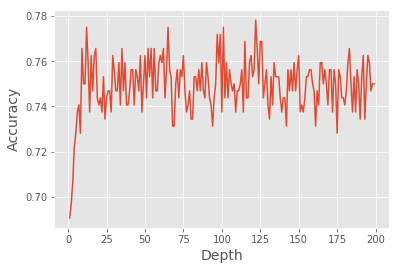

In [16]:
# Plot the relationship between tree depths and prediction power
depth = []
accuracy = []
for x in range(1, 200):
    depth.append(x)
    tree_model = DecisionTreeClassifier(max_depth=x)
    tree_model.fit(X_train, y_train)
    accu = tree_model.score(X_test, y_test)
    accuracy.append(accu)
    plt.xlabel("Depth", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
plt.plot(depth, accuracy)
plt.show()

In [17]:
%%time
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
print('Naive Bayes accuracy for test set: %f' % nb_model.score(X_test, y_test))

Naive Bayes accuracy for test set: 0.721875
CPU times: user 4.65 ms, sys: 1.46 ms, total: 6.11 ms
Wall time: 4.94 ms


In [18]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print('Naive Bayes accuracy for test set: %f' % nb_model.score(X_test, y_test))

ValueError: Input X must be non-negative

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
print('Naive Bayes accuracy for test set: %f' % nb_model.score(X_test, y_test))

In [22]:
%%time
# Neural Network
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp_model.fit(X_train, y_train)
print('Neural Network accuracy for test set: %f' % mlp_model.score(X_test, y_test))

Neural Network accuracy for test set: 0.768750
CPU times: user 2.43 s, sys: 35 ms, total: 2.47 s
Wall time: 1.29 s


In [51]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

mlp_model = MLPClassifier(hidden_layer_sizes=(10,10),solver='sgd',learning_rate_init=0.1,max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
print('Neural Network accuracy for test set: %f' % mlp_model.score(X_test, y_test))

Neural Network accuracy for test set: 0.762500
CPU times: user 289 ms, sys: 5.91 ms, total: 295 ms
Wall time: 162 ms
